In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

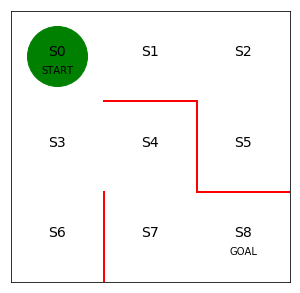

In [2]:
# init maze

fig = plt.figure(figsize=(5, 5))
ax = plt.gca()

# red wall
plt.plot([1, 1], [0, 1], color='red',linewidth=2)
plt.plot([1, 2], [2, 2], color='red',linewidth=2)
plt.plot([2, 2], [2, 1], color='red',linewidth=2)
plt.plot([2, 3], [1, 1], color='red',linewidth=2)

# states
plt.text(0.5, 2.5, 'S0', size=14, ha='center')
plt.text(1.5, 2.5, 'S1', size=14, ha='center')
plt.text(2.5, 2.5, 'S2', size=14, ha='center')
plt.text(0.5, 1.5, 'S3', size=14, ha='center')
plt.text(1.5, 1.5, 'S4', size=14, ha='center')
plt.text(2.5, 1.5, 'S5', size=14, ha='center')
plt.text(0.5, 0.5, 'S6', size=14, ha='center')
plt.text(1.5, 0.5, 'S7', size=14, ha='center')
plt.text(2.5, 0.5, 'S8', size=14, ha='center')
plt.text(0.5, 2.3, 'START', ha='center')
plt.text(2.5, 0.3, 'GOAL', ha='center')

ax.set_xlim(0, 3)
ax.set_ylim(0, 3)
plt.tick_params(axis='both', which='both', bottom=False, top=False, labelbottom=False, right=False, left=False, labelleft=False)

line, = ax.plot([0.5], [2.5], marker="o", color='g', markersize=60)

In [3]:
# init param(thetha_0) of the policy

# row (up, right, down, left)
theta_0 = np.array([[np.nan, 1, 1, np.nan], # S0
                     [np.nan, 1, np.nan, 1], # S1
                     [np.nan, np.nan, 1, 1], # S2
                     [1, 1, 1, np.nan], # S3
                     [np.nan, np.nan, 1, 1], # S4
                     [1, np.nan, np.nan, np.nan], # S5
                     [1, np.nan, np.nan, np.nan], # S6
                     [1, 1, np.nan, np.nan] # S7, S8 is goal
                    ])

In [4]:
def softmax_convert_into_pi_from_theta(theta):
    '''using softmax function'''
    
    beta = 1.0 # beta : inverse temperature
    [m, n] = theta.shape
    pi = np.zeros((m, n)) # pi : policy
    
    exp_theta = np.exp(beta * theta)
    
    for i in range(0, m):
        pi[i, :] = exp_theta[i, :] / np.nansum(exp_theta[i, :])
        
    pi = np.nan_to_num(pi)
        
    return pi

In [5]:
pi_0 = softmax_convert_into_pi_from_theta(theta_0)
print(pi_0)

[[0.         0.5        0.5        0.        ]
 [0.         0.5        0.         0.5       ]
 [0.         0.         0.5        0.5       ]
 [0.33333333 0.33333333 0.33333333 0.        ]
 [0.         0.         0.5        0.5       ]
 [1.         0.         0.         0.        ]
 [1.         0.         0.         0.        ]
 [0.5        0.5        0.         0.        ]]


In [6]:
def get_action_and_next_s(pi, s):
    direction = ["up", "right", "down", "left"]
    next_direction = np.random.choice(direction, p=pi[s, :])
    
    if next_direction == "up":
        action = 0
        s_next = s - 3
    elif next_direction == "right":
        action = 1
        s_next = s + 1
    elif next_direction == "down":
        action = 2
        s_next = s + 3
    elif next_direction == "left":
        action = 3
        s_next = s - 1
        
    return [action, s_next]

In [7]:
def goal_maze_ret_s_a(pi):
    s = 0
    s_a_history = [[0, np.nan]]
    
    while (1):
        [action, next_s] = get_action_and_next_s(pi, s)
        s_a_history[-1][1] = action
        
        s_a_history.append([next_s, np.nan])
        
        if next_s == 8:
            break
        else:
            s = next_s
            
    return s_a_history

In [8]:
s_a_history = goal_maze_ret_s_a(pi_0)
print(s_a_history)
print("step : " + str(len(s_a_history) - 1))

[[0, 1], [1, 1], [2, 2], [5, 0], [2, 3], [1, 3], [0, 1], [1, 3], [0, 2], [3, 1], [4, 2], [7, 0], [4, 3], [3, 1], [4, 2], [7, 1], [8, nan]]
step : 16


In [9]:
def update_theta(theta, pi, s_a_history):
    eta = 0.1 # 학습률
    T = len(s_a_history) -1 # 목표 지점에 이르기까지 걸린 단계 수
    
    [m, n] = theta.shape
    delta_theta = theta.copy()
    
    for i in range(0, m):
        for j in range(0, n):
            if not(np.isnan(theta[i,j])):
                # state i
                SA_i = [SA for SA in s_a_history if SA[0] == i]
                # state i and action j
                SA_ij = [SA for SA in s_a_history if SA == [i, j]]
                
                N_i = len(SA_i)
                N_ij = len(SA_ij)
                
                delta_theta[i,j] = (N_ij - pi[i,j] * N_i) / T
                
    new_theta = theta + eta * delta_theta
            
    return new_theta

In [10]:
# modify policy
new_theta = update_theta(theta_0, pi_0, s_a_history)
pi = softmax_convert_into_pi_from_theta(new_theta)
print(pi)

[[0.         0.50156249 0.49843751 0.        ]
 [0.         0.49843751 0.         0.50156249]
 [0.         0.         0.5        0.5       ]
 [0.33194156 0.33611687 0.33194156 0.        ]
 [0.         0.         0.50156249 0.49843751]
 [1.         0.         0.         0.        ]
 [1.         0.         0.         0.        ]
 [0.5        0.5        0.         0.        ]]


In [12]:
stop_epsilon = 10**-4

theta = theta_0
pi = pi_0

is_continue = True
count = 1
while is_continue:
    s_a_history = goal_maze_ret_s_a(pi)
    new_theta = update_theta(theta, pi, s_a_history)
    new_pi = softmax_convert_into_pi_from_theta(new_theta)
    
    print(np.sum(np.abs(new_pi - pi)))
    print("step : " + str(len(s_a_history) - 1))
    
    if np.sum(np.abs(new_pi - pi)) < stop_epsilon:
        is_continue = False
    else:
        theta = new_theta
        pi = new_pi

0.0033333302469171766
step : 30
0.014436905158409785
step : 20
0.014522321966631002
step : 10
0.01424702064113692
step : 38
0.02166325978223227
step : 10
0.015053748169873482
step : 36
0.016159116013440444
step : 28
0.020045704618284754
step : 20
0.013777967832088456
step : 24
0.015425682279928798
step : 40
0.024764058788881937
step : 8
0.011180415285260037
step : 60
0.011292229128406384
step : 22
0.04772473649125286
step : 4
0.012679269295729823
step : 50
0.02137447739576165
step : 20
0.01667547944370512
step : 74
0.020619701016080405
step : 12
0.03927818327244309
step : 6
0.03663955757139625
step : 8
0.00772829044786133
step : 28
0.014501532980751741
step : 30
0.014811796681738099
step : 12
0.046268316771606144
step : 4
0.04575386628677447
step : 4
0.01539896743898661
step : 44
0.014727899515308673
step : 26
0.024868612728691952
step : 8
0.014628058290232338
step : 26
0.013362555818587307
step : 18
0.013846058760461577
step : 16
0.020946468831870735
step : 20
0.018415653735991133
ste

0.016733069224626612
step : 6
0.02266395738842225
step : 4
0.0162471081619234
step : 10
0.019731340581340406
step : 20
0.015404595373886831
step : 18
0.025903784217088027
step : 14
0.02159626219125632
step : 6
0.01595267170372533
step : 10
0.007906248208221278
step : 12
0.021351068357327224
step : 6
0.016427539654855744
step : 10
0.012573536358108484
step : 8
0.011308175626739664
step : 20
0.0212743007665194
step : 6
0.01632280967933411
step : 12
0.011580956822682453
step : 10
0.01882045901933943
step : 8
0.013534494907266659
step : 14
0.013850060929270103
step : 6
0.01864282319810348
step : 8
0.016278567485580403
step : 10
0.0148167407877558
step : 8
0.022394821989362962
step : 4
0.013328313695583793
step : 12
0.016831241866691438
step : 10
0.022134151386825396
step : 4
0.021826041758206655
step : 4
0.015502372334568248
step : 6
0.02135967751360654
step : 4
0.019097263448483615
step : 10
0.02112515204521931
step : 4
0.01436162174828523
step : 8
0.020786019797969096
step : 4
0.02050013

0.005880873593756122
step : 4
0.005822168013291704
step : 4
0.00737759655614631
step : 6
0.005782288432991875
step : 4
0.012000327364311156
step : 8
0.00578022958545063
step : 4
0.005722919766000437
step : 4
0.005666394976949263
step : 4
0.010882423221269727
step : 10
0.00567059208015365
step : 4
0.005614861714126146
step : 4
0.005559888992702919
step : 4
0.005505661412844462
step : 4
0.01092438412864262
step : 8
0.005475871658704709
step : 4
0.005422899343595591
step : 4
0.010093691498202564
step : 10
0.005451355897728438
step : 4
0.0053986647050803666
step : 4
0.005346680150531441
step : 4
0.0052953906761911695
step : 4
0.0052447849339205405
step : 4
0.010027276552062717
step : 10
0.007076684929295515
step : 6
0.01037465972150746
step : 8
0.005374667473146938
step : 4
0.005322847435921041
step : 4
0.005271719867199626
step : 4
0.005221273539222859
step : 4
0.013576321336671249
step : 12
0.007400736198329053
step : 8
0.013462744356140102
step : 6
0.007579381577174971
step : 8
0.005379

0.0019583036238843693
step : 4
0.004762591066334379
step : 6
0.001970242628380879
step : 4
0.004802112555799903
step : 6
0.004855115711707866
step : 6
0.002008644228282161
step : 4
0.001995849605384209
step : 4
0.0048806693853630165
step : 6
0.0054941766840990724
step : 8
0.002037903932162771
step : 4
0.006523287553420687
step : 8
0.0020472085206720003
step : 4
0.0020340455577085026
step : 4
0.0020210060777896416
step : 4
0.0020080885792769163
step : 4
0.001995291582636248
step : 4
0.001982613630057334
step : 4
0.007236385196354049
step : 10
0.004873558618707377
step : 6
0.004926576042796851
step : 6
0.013348423674126482
step : 8
0.002057180091948732
step : 4
0.002043885971200976
step : 4
0.0020307173257258157
step : 4
0.004778952789854463
step : 6
0.0020392042944239255
step : 4
0.0020260500870685344
step : 4
0.002013019939651889
step : 4
0.0020001123338332996
step : 4
0.004707261094690836
step : 6
0.001997897149917695
step : 4
0.004758115536721404
step : 6
0.0019966657736415414
step :

0.001047737965734645
step : 4
0.0010424634350147885
step : 4
0.0010372292840577224
step : 4
0.0032686644601229026
step : 6
0.0010395679938517352
step : 4
0.001034371885251996
step : 4
0.0010292152120446457
step : 4
0.0039061828448722427
step : 6
0.001044744902047999
step : 4
0.0010394828495051758
step : 4
0.00330084087047168
step : 6
0.0010421448446227416
step : 4
0.0010369183822137931
step : 4
0.0010317317316928046
step : 4
0.001026584487473406
step : 4
0.0010214762491012538
step : 4
0.0010164066211791958
step : 4
0.0010113752132904774
step : 4
0.0010063816399239964
step : 4
0.0010014255204026518
step : 4
0.0009965064788110684
step : 4
0.0009916241439261592
step : 4
0.0009867781491441699
step : 4
0.00098196813241741
step : 4
0.0009771937361836083
step : 4
0.003494061213305373
step : 6
0.0009887517897336842
step : 4
0.0009839096970837569
step : 4
0.0009791036736239295
step : 4
0.0009743333595274087
step : 4
0.0009695983994347027
step : 4
0.000964898442384475
step : 4
0.0031903018758787

0.0006637462190716391
step : 4
0.0006610428810727292
step : 4
0.000658356377946985
step : 4
0.0006556865685316618
step : 4
0.0006530333131451356
step : 4
0.0006503964735724219
step : 4
0.0006477759130388942
step : 4
0.0006451714962027524
step : 4
0.0006425830891270551
step : 4
0.0006400105592694882
step : 4
0.0006374537754622496
step : 4
0.0025387795545665365
step : 6
0.0006402944294426303
step : 4
0.0026908103592131125
step : 6
0.003122443014427132
step : 6
0.0006556700386269668
step : 4
0.0006530223414336969
step : 4
0.000650390966594902
step : 4
0.0006477757787504007
step : 4
0.0006451766439468029
step : 4
0.000642593429617172
step : 4
0.002725559259993869
step : 6
0.0006448455838744954
step : 4
0.0006422733305577431
step : 4
0.0006397167109422688
step : 4
0.0006371755973530457
step : 4
0.0006346498634188132
step : 4
0.0006321393840572793
step : 4
0.0006296440354602931
step : 4
0.00062716369507608
step : 4
0.0006246982415955143
step : 4
0.0006222475549375397
step : 4
0.0025287270814

step : 6
0.00039941872440689766
step : 4
0.00039816343180998706
step : 4
0.0023396260881500264
step : 6
0.0004045320933586498
step : 4
0.0004032468152858418
step : 4
0.00040196780708940186
step : 4
0.0004006950273228345
step : 4
0.00039942843488281754
step : 4
0.00039816798900984066
step : 4
0.00039691364928407316
step : 4
0.00039566537561655166
step : 4
0.0003944231282574477
step : 4
0.00039318686777913697
step : 4
0.0003919565550834468
step : 4
0.0003907321513935795
step : 4
0.00038951361825062883
step : 4
0.00038830091751305973
step : 4
0.00038709401135097674
step : 4
0.000385892862244875
step : 4
0.0003846974329816122
step : 4
0.0003835076866520737
step : 4
0.0003823235866463118
step : 4
0.0003811450966540626
step : 4
0.000379972180658425
step : 4
0.0003788048029350795
step : 4
0.00037764292804778887
step : 4
0.0003764865208476867
step : 4
0.0003753355464682119
step : 4
0.00037418997032516443
step : 4
0.000373049758108996
step : 4
0.00037191487578984786
step : 4
0.00037078528960673

0.00023921902801860712
step : 4
0.0002386350017223246
step : 4
0.00023805316442207514
step : 4
0.000237473504984001
step : 4
0.00023689601234372706
step : 4
0.00023632067551215136
step : 4
0.000235747483566702
step : 4
0.00023517642565670793
step : 4
0.00023460749100065806
step : 4
0.00023404066888666267
step : 4
0.0019420992733234534
step : 6
0.005525716734428331
step : 6
0.00024010165048423196
step : 4
0.0014608464302183627
step : 6
0.00024133473232807248
step : 4
0.00024074435328283114
step : 4
0.00024015619101293295
step : 4
0.00023957023421819837
step : 4
0.00023898647167069215
step : 4
0.00023840489221735664
step : 4
0.00023782548477328108
step : 4
0.00023724823832751638
step : 4
0.00023667314193853012
step : 4
0.0002361001847361148
step : 4
0.00023552935591775181
step : 4
0.00023496064475125866
step : 4
0.0002343940405735538
step : 4
0.0015977237689364585
step : 6
0.0002367463592978028
step : 4
0.0002361742848733077
step : 4
0.0002356043278839981
step : 4
0.0002350364777064448
s

0.00017950817650609283
step : 4
0.00017913023697967156
step : 4
0.00017875352033325936
step : 4
0.00017837802117869235
step : 4
0.0013174166313852324
step : 6
0.00017998209718787447
step : 4
0.000179603674445767
step : 4
0.00017922647216932729
step : 4
0.000178850485009591
step : 4
0.00017847570764687772
step : 4
0.00017810213479072488
step : 4
0.00017772976118064776
step : 4
0.00017735858158370726
step : 4
0.0001769885907989665
step : 4
0.0001766197836505102
step : 4
0.00017625215499432988
step : 4
0.00017588569971239455
step : 4
0.00017552041271686608
step : 4
0.0013359469741514723
step : 6
0.00017722813689640543
step : 4
0.00017685943600697848
step : 4
0.00017649190921570357
step : 4
0.010339029434349754
step : 8
0.00017707045952351438
step : 4
0.00017670331177300873
step : 4
0.00017633732804623985
step : 4
0.00017597250333984717
step : 4
0.00017560883267718312
step : 4
0.00017524631110811713
step : 4
0.0015473460435025278
step : 6
0.00017828108210043297
step : 4
0.00017790855055223

0.00015323164038714109
step : 4
0.00015292803986592142
step : 4
0.00015262537082661246
step : 4
0.00015232362935981708
step : 4
0.0001520228115806134
step : 4
0.00015172291362230625
step : 4
0.00015142393164024014
step : 4
0.00015112586180957358
step : 4
0.0001508287003263737
step : 4
0.0001505324434060238
step : 4
0.00015023708728431097
step : 4
0.00014994262821821716
step : 4
0.00014964906248163962
step : 4
0.00014935638637138086
step : 4
0.00014906459620204343
step : 4
0.00014877368830738813
step : 4
0.001561097040685775
step : 6
0.00015198520783876214
step : 4
0.00015168374343678057
step : 4
0.00015138320735352644
step : 4
0.00015108359567336978
step : 4
0.00015078490450272895
step : 4
0.00015048712996923973
step : 4
0.00015019026822130598
step : 4
0.00014989431542581678
step : 4
0.00014959926777376696
step : 4
0.00014930512147327303
step : 4
0.0001490118727553516
step : 4
0.00014871951786871174
step : 4
0.00014842805308303356
step : 4
0.0001481374746885051
step : 4
0.0001478477789

step : 4
0.0001163588159410877
step : 4
0.00011615214526037622
step : 4
0.00011594605093708313
step : 4
0.00011574053075326211
step : 4
0.00011553558250384198
step : 4
0.00011533120399310516
step : 4
0.00011512739303749624
step : 4
0.00011492414746260178
step : 4
0.00011472146510677246
step : 4
0.00011451934381628663
step : 4
0.00011431778145017286
step : 4
0.00011411677587595294
step : 4
0.00011391632497459447
step : 4
0.00011371642663343846
step : 4
0.00011351707875344522
step : 4
0.00011331827924324425
step : 4
0.00011312002602432286
step : 4
0.00011292231702531366
step : 4
0.00011272515018685009
step : 4
0.00011252852345934247
step : 4
0.00011233243480258427
step : 4
0.00011213688218541032
step : 4
0.00011194186358864759
step : 4
0.00011174737700167005
step : 4
0.00011155342042244547
step : 4
0.00011135999186055907
step : 4
0.00011116708933386378
step : 4
0.00011097471087006747
step : 4
0.00011078285450653001
step : 4
0.00011059151828953818
step : 4
0.00011040070027546964
step : 4


In [13]:
np.set_printoptions(precision=3, suppress=True)
print(pi)

[[0.    0.011 0.989 0.   ]
 [0.    0.296 0.    0.704]
 [0.    0.    0.432 0.568]
 [0.012 0.973 0.015 0.   ]
 [0.    0.    0.987 0.013]
 [1.    0.    0.    0.   ]
 [1.    0.    0.    0.   ]
 [0.014 0.986 0.    0.   ]]


In [14]:
# refer url : http://louistiao.me/posts/notebooks/embedding-matplotlib-animations-in-jupyter-notebooks/
from matplotlib import animation
from IPython.display import HTML

def init():
    # initialize background
    line.set_data([], [])
    return (line,)

def animate(i):
    state = s_a_history[i][0]
    x = (state % 3) + 0.5
    y = 2.5 - int(state / 3)
    line.set_data(x, y)
    return (line,)

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=len(s_a_history), interval=200, repeat=False)

HTML(anim.to_jshtml())